<font size="5"> <a href="https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis=MAC0209"> Exercício de MAC0209 - Modelagem e Simulação</a> </font>

Rafael Baía Sales - 15484912 (IME-USP)

Rafael dos Santos Lombardi - 15485062 (IME-USP)

***
<font size="5"> EP2 - Mobilidade Pedestre </font>
***

# Setup

In [82]:
# setup aqui

## Depois a gente exporta para o Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

#################

import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sideseeing_tools import sideseeing, plot


# Lib

In [83]:
# lib aqui


# edite seu path abaixo:
# def myPath():
#   workDir = '/content/drive/MyDrive/doc/Courses/Modelagem/programas/jupyter/2022/'
#   return(workDir)

# def demoWorkDir():
#   # usa o ponto de montagem do google drive para  ler e salvar dados
#   wd = myPath()
#   csvFile = wd + 'foo.csv'

#   df = pd.read_csv(csvFile, sep = ';')
#   print(df.to_string())

# demoWorkDir()

##################

def plotxyz(
    ds: pd.core.frame.DataFrame,
    dimensions: str = "xyz",
    title: str = None,
    ylabel: str = None,
    ):
    
    fig = plt.figure(figsize=(15,5))
    if 'x' in dimensions: plt.plot(ds['Time (s)'], ds['x'], label='x')
    if 'y' in dimensions: plt.plot(ds['Time (s)'], ds['y'], label='y')
    if 'z' in dimensions: plt.plot(ds['Time (s)'], ds['z'], label='z')
    plt.xlabel("Tempo (s)")
    
    if title: plt.title(title)
    if ylabel: plt.ylabel(ylabel)
    
    plt.legend()
    plt.show()
    
    return

def plotmean(
    meands: pd.core.frame.DataFrame,
    stdds: pd.core.frame.DataFrame,
    dimensions: str = "xyz",
    title: str = None,
    ylabel: str = None,
    ):
    
    fig = plt.figure(figsize=(15,5))
    if 'x' in dimensions: plt.errorbar(x=meands.index, y=meands['x'], yerr=stdds['x'], label='x', ecolor='red', errorevery=5, capsize=2)
    if 'y' in dimensions: plt.errorbar(x=meands.index, y=meands['y'], yerr=stdds['y'], label='y', ecolor='red', errorevery=5, capsize=2)
    if 'z' in dimensions: plt.errorbar(x=meands.index, y=meands['z'], yerr=stdds['z'], label='z', ecolor='red', errorevery=5, capsize=2)
    plt.xlabel("Tempo (s)")
    
    if title: plt.title(title)
    if ylabel: plt.ylabel(ylabel)
    
    plt.legend()
    plt.show()
    
    return


---
# Main

In [84]:
mu_reta_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MU_Reta", name="MU_Reta")
mu_zz_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MU_Zigzag", name="MU_Zigzag")
muv_reta_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MUV_Reta", name="MUV_Reta")
muv_zz_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MUV_Zigzag", name="MUV_Zigzag")

INFO. Loading data.
INFO. Done.
INFO. Loading data.
INFO. Done.
INFO. Loading data.
INFO. Done.
INFO. Loading data.
INFO. Done.


### Sensores:

In [85]:
for sensors in ["sensors1", "sensors3", "sensors6"]:
    print(f"{sensors.capitalize()}:")
    for sensor in mu_reta_ds.sensors[sensors].keys():
        print(f" - {sensor}")
    print()

Sensors1:
 - stk33911 light  non-wakeup
 - lps22hh pressure sensor non-wakeup

Sensors3:
 - lsm6dso lsm6dso accelerometer non-wakeup
 - ak09918 magnetometer
 - lsm6dso lsm6dso gyroscope non-wakeup
 - gravity  non-wakeup
 - linear_acceleration

Sensors6:
 - ak09918 magnetometer-uncalibrated
 - lsm6dso lsm6dso gyroscope-uncalibrated non-wakeup



* Mais detalhes sobre os sensores em [https://developer.android.com/develop/sensors-and-location/sensors/sensors_overview](https://developer.android.com/develop/sensors-and-location/sensors/sensors_overview)

## MU Reta

- #### **Aceleração Linear**

Instância: '2-2025-05-22-14-52-08-657'


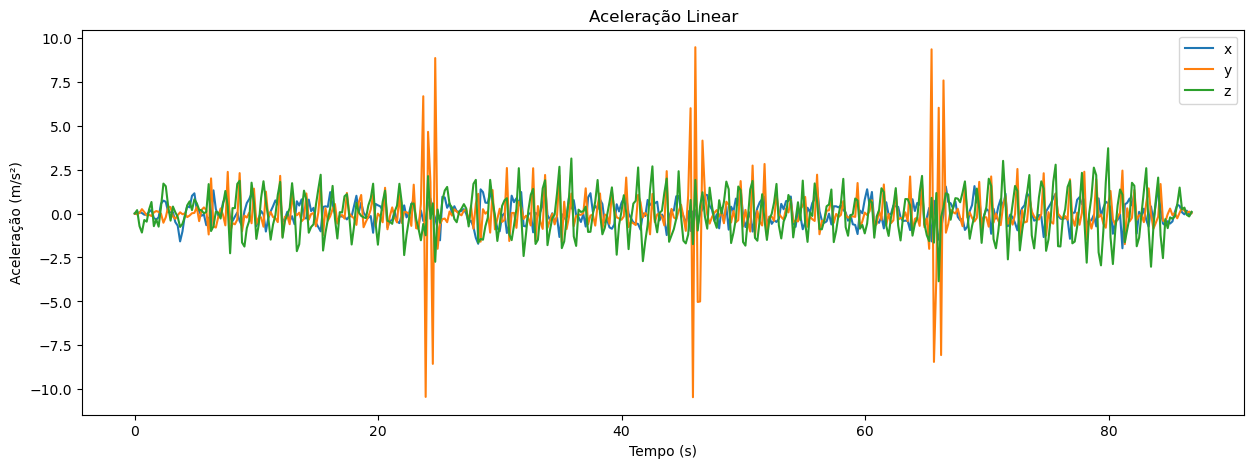

In [86]:
mu_reta_sample = mu_reta_ds.instance
print(f"Instância: '{mu_reta_sample.name}'")
mu_reta_sample_accel = mu_reta_sample.sensors3['linear_acceleration'] # Exclui a gravidade, 'lsm6dso lsm6dso accelerometer non-wakeup' inclui

plotxyz(mu_reta_sample_accel, dimensions='xyz', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

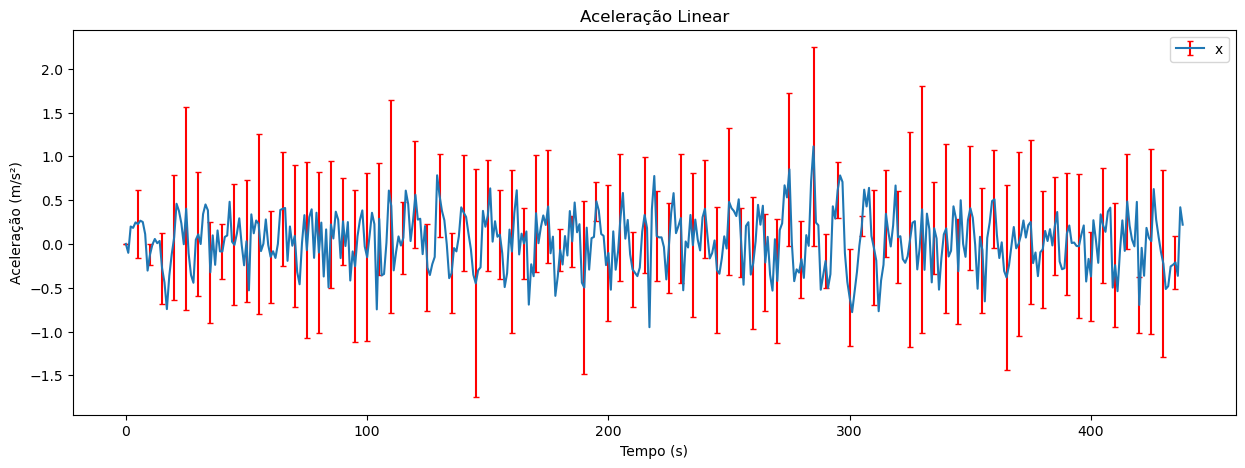

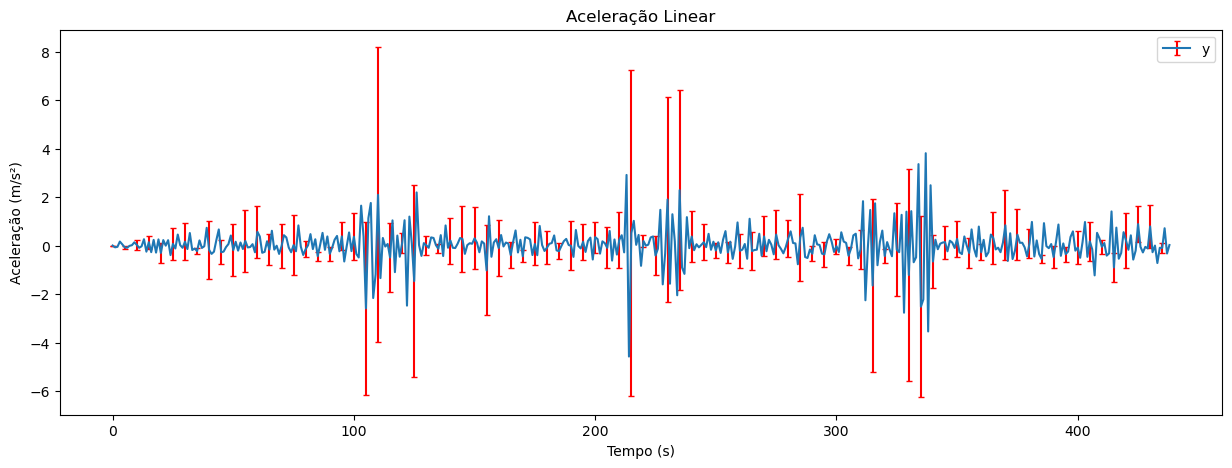

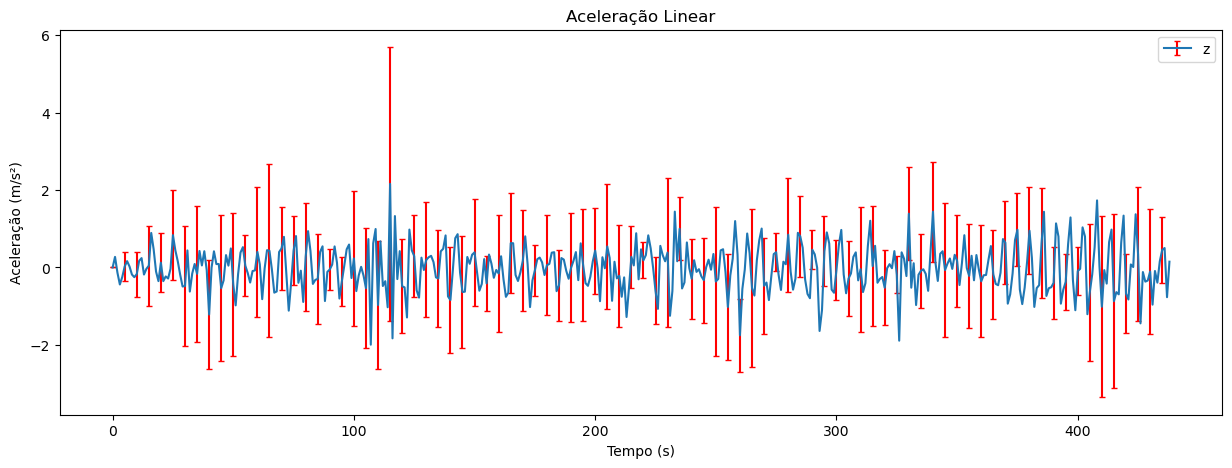

In [87]:
instances_accel = list(map(lambda x: x.sensors3['linear_acceleration'][['x', 'y', 'z']][:439].reset_index(), mu_reta_ds.instances.values()))

instances_mean = pd.concat(instances_accel).groupby(level=0).mean()
instances_std = pd.concat(instances_accel).groupby(level=0).std()

plotmean(instances_mean, instances_std, dimensions='x', title="Aceleração Linear", ylabel="Aceleração (m/s²)")
plotmean(instances_mean, instances_std, dimensions='y', title="Aceleração Linear", ylabel="Aceleração (m/s²)")
plotmean(instances_mean, instances_std, dimensions='z', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

- #### **Campo magnético** (orientação)

Instância: '2-2025-05-22-14-58-55-062'


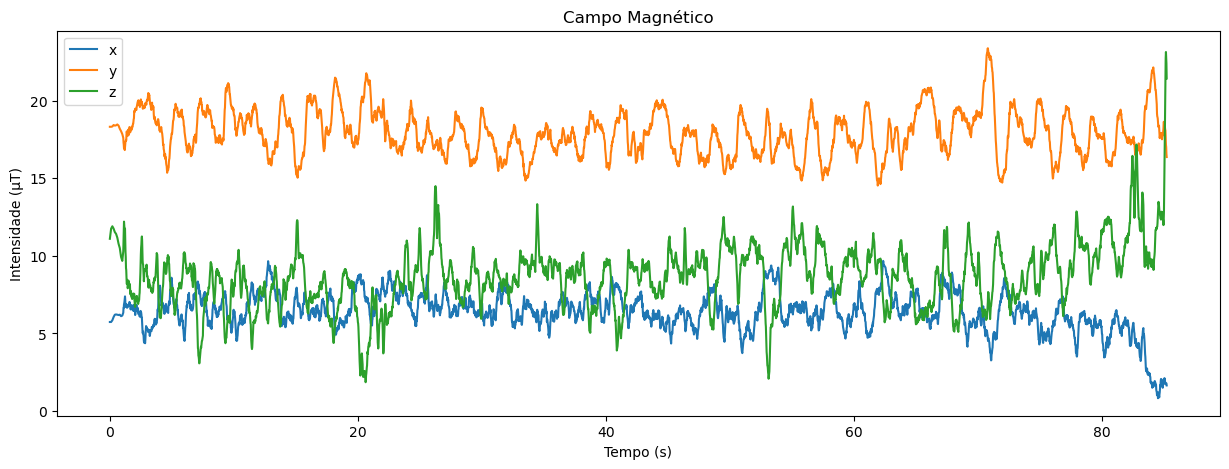

In [88]:
mu_reta_sample = mu_reta_ds.instance
print(f"Instância: '{mu_reta_sample.name}'")
mu_reta_sample_magnet = mu_reta_sample.sensors3['ak09918 magnetometer'] 

plotxyz(mu_reta_sample_magnet, dimensions='xyz', title="Campo Magnético", ylabel="Intensidade (μT)")

- #### **Giroscópio** (rotação)

Instância: '2-2025-05-22-14-55-27-504'


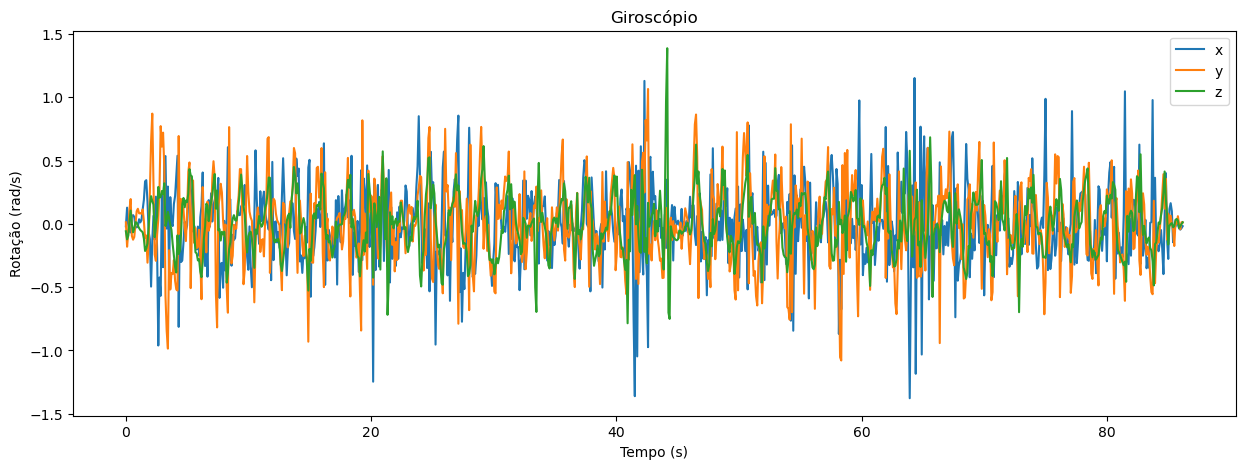

In [89]:
mu_reta_sample = mu_reta_ds.instance
print(f"Instância: '{mu_reta_sample.name}'")
mu_reta_sample_gyro = mu_reta_sample.sensors3['lsm6dso lsm6dso gyroscope non-wakeup'] 

plotxyz(mu_reta_sample_gyro, dimensions='xyz', title="Giroscópio", ylabel="Rotação (rad/s)")

## MU Zigue Zague

- #### **Aceleração Linear**

Instância: '1-2025-05-22-15-18-30-442'


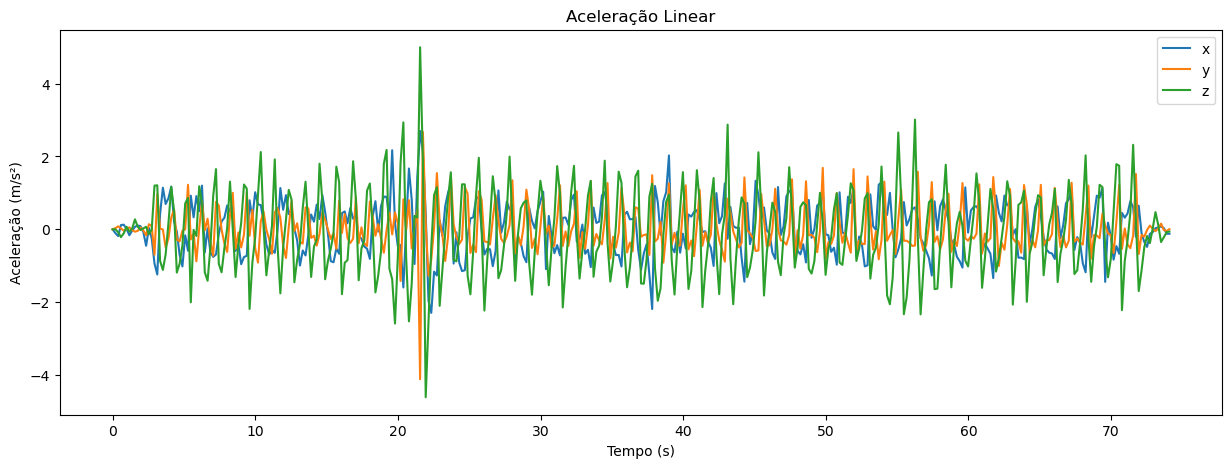

In [90]:
mu_zz_sample = mu_zz_ds.instance
print(f"Instância: '{mu_zz_sample.name}'")
mu_zz_sample_accel = mu_zz_sample.sensors3['linear_acceleration']

plotxyz(mu_zz_sample_accel, dimensions='xyz', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

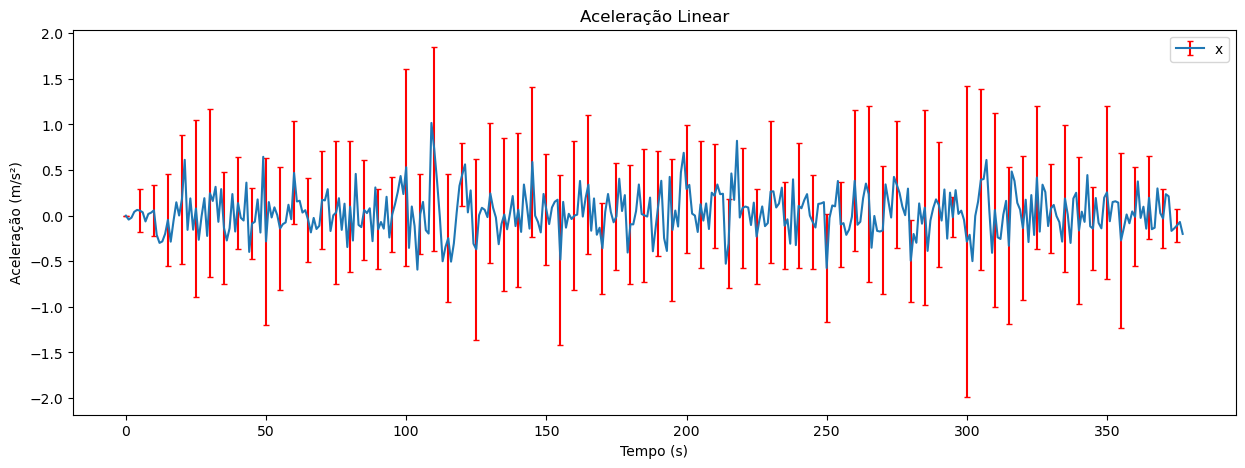

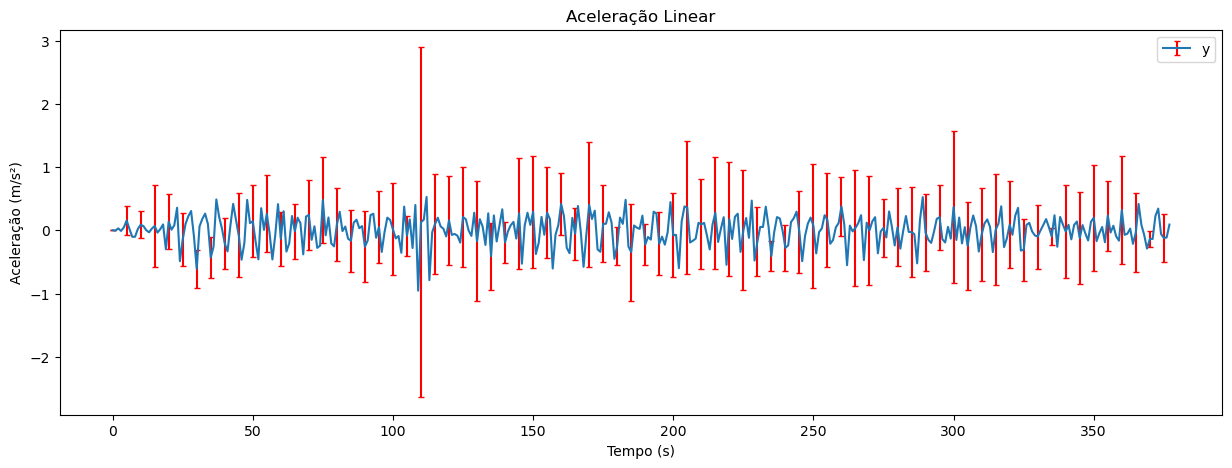

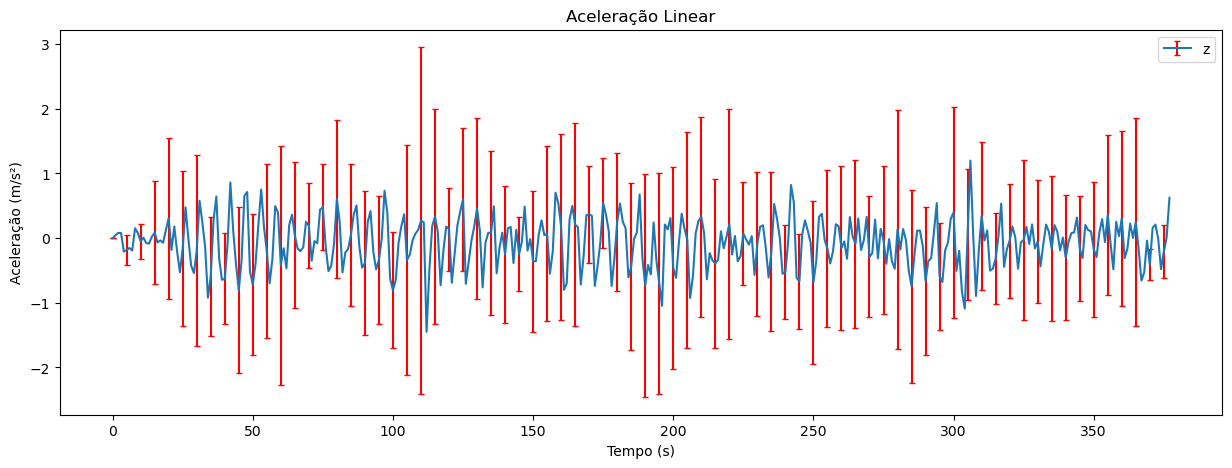

In [91]:
instances_accel = list(map(lambda x: x.sensors3['linear_acceleration'][['x', 'y', 'z']][:378].reset_index(), mu_zz_ds.instances.values()))

instances_mean = pd.concat(instances_accel).groupby(level=0).mean()
instances_std = pd.concat(instances_accel).groupby(level=0).std()

plotmean(instances_mean, instances_std, dimensions='x', title="Aceleração Linear", ylabel="Aceleração (m/s²)")
plotmean(instances_mean, instances_std, dimensions='y', title="Aceleração Linear", ylabel="Aceleração (m/s²)")
plotmean(instances_mean, instances_std, dimensions='z', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

- #### **Campo magnético** (orientação)

Instância: '1-2025-05-22-15-18-30-442'


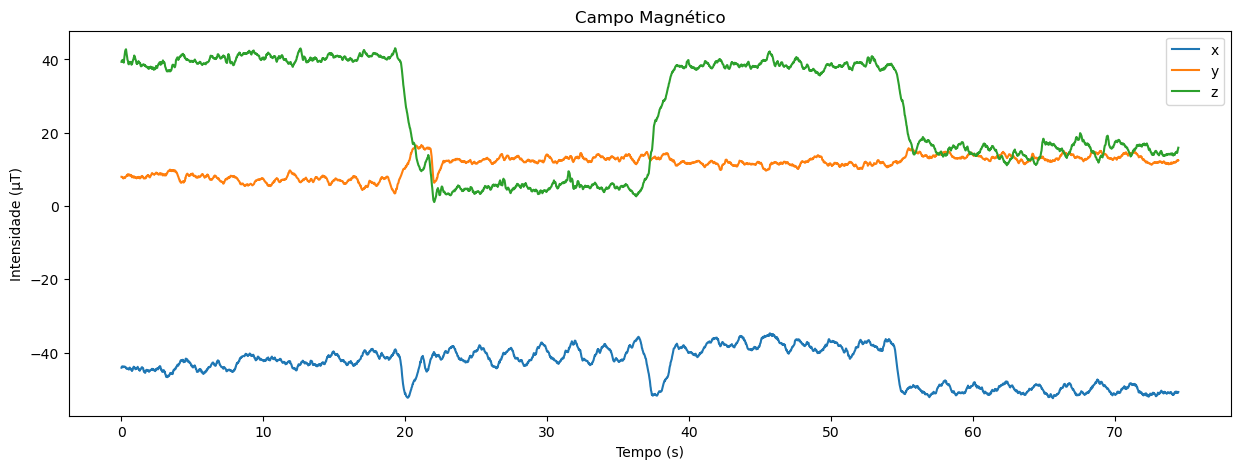

In [92]:
mu_zz_sample = mu_zz_ds.instance
print(f"Instância: '{mu_zz_sample.name}'")
mu_zz_sample_magnet = mu_zz_sample.sensors3['ak09918 magnetometer'] 

plotxyz(mu_zz_sample_magnet, dimensions='xyz', title="Campo Magnético", ylabel="Intensidade (μT)")

- #### **Giroscópio** (rotação)

Instância: '1-2025-05-22-15-20-42-082'


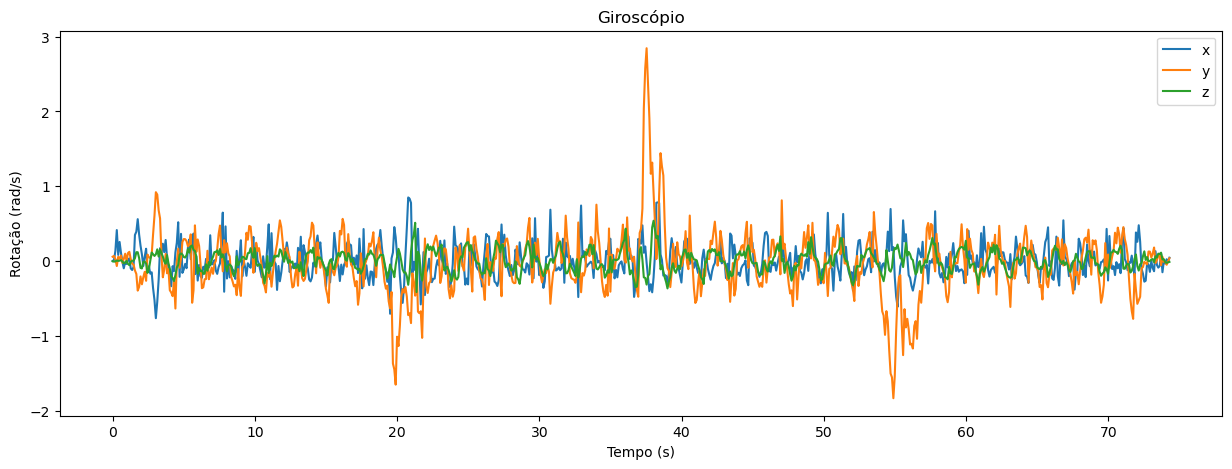

In [93]:
mu_zz_sample = mu_zz_ds.instance
print(f"Instância: '{mu_zz_sample.name}'")
mu_zz_sample_gyro = mu_zz_sample.sensors3['lsm6dso lsm6dso gyroscope non-wakeup'] 

plotxyz(mu_zz_sample_gyro, dimensions='xyz', title="Giroscópio", ylabel="Rotação (rad/s)")

## MUV Reta

- #### **Aceleração Linear**

Instância: '1-2025-05-22-15-53-27-217'


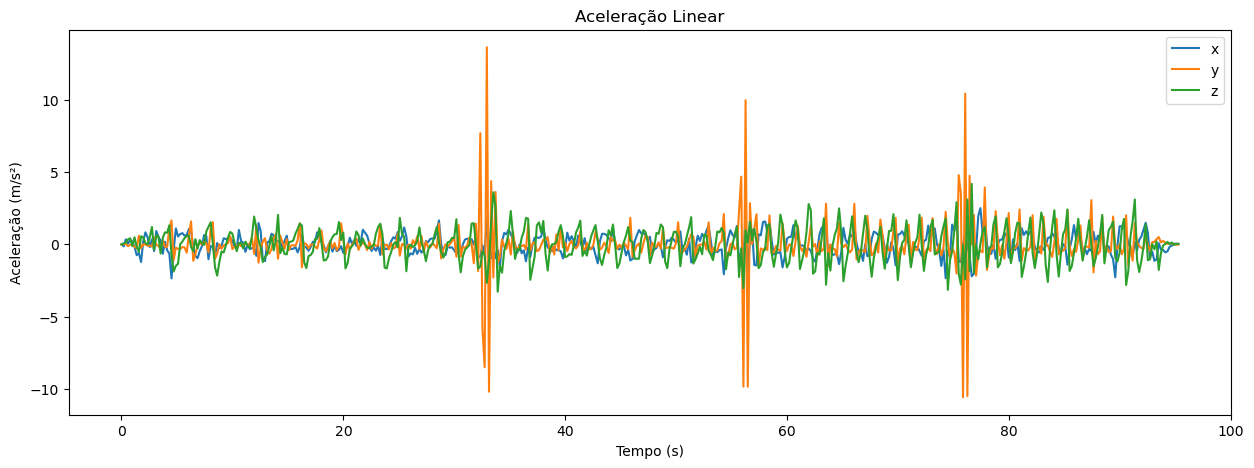

In [94]:
muv_reta_sample = muv_reta_ds.instance
print(f"Instância: '{muv_reta_sample.name}'")
muv_reta_sample_accel = muv_reta_sample.sensors3['linear_acceleration']

plotxyz(muv_reta_sample_accel, dimensions='xyz', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

- #### **Campo magnético** (orientação)

Instância: '2025-05-22-15-57-57-936'


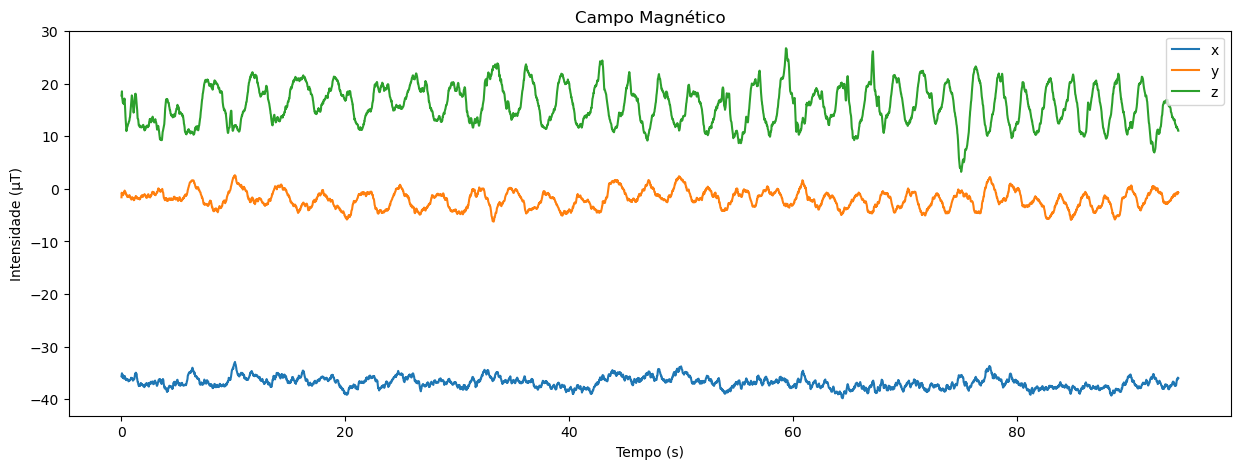

In [95]:
muv_reta_sample = muv_reta_ds.instance
print(f"Instância: '{muv_reta_sample.name}'")
muv_reta_sample_magnet = muv_reta_sample.sensors3['ak09918 magnetometer'] 

plotxyz(muv_reta_sample_magnet, dimensions='xyz', title="Campo Magnético", ylabel="Intensidade (μT)")

- #### **Giroscópio** (rotação)

Instância: '1-2025-05-22-15-53-27-217'


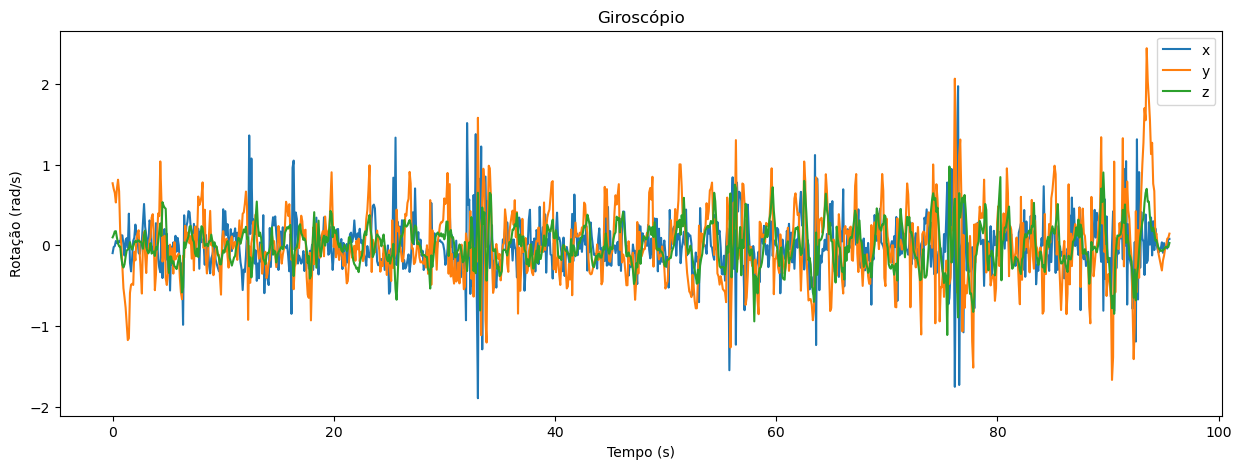

In [96]:
muv_reta_sample = muv_reta_ds.instance
print(f"Instância: '{muv_reta_sample.name}'")
muv_reta_sample_gyro = muv_reta_sample.sensors3['lsm6dso lsm6dso gyroscope non-wakeup'] 

plotxyz(muv_reta_sample_gyro, dimensions='xyz', title="Giroscópio", ylabel="Rotação (rad/s)")

## MUV Zigue Zague

- #### **Aceleração Linear**

Instância: '1-2025-05-22-15-39-52-283'


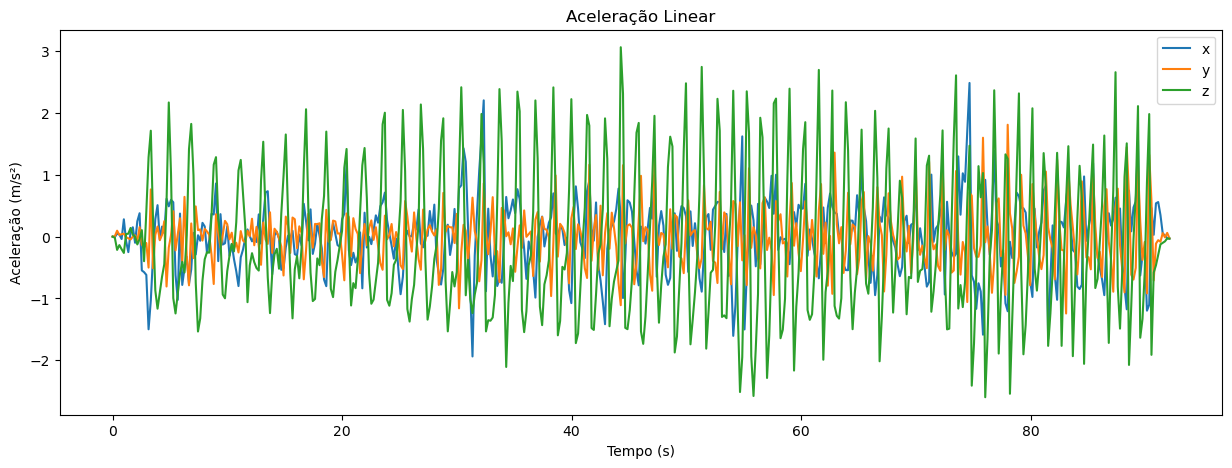

In [97]:
muv_zz_sample = muv_zz_ds.instance
print(f"Instância: '{muv_zz_sample.name}'")
muv_zz_sample_accel = muv_zz_sample.sensors3['linear_acceleration']

plotxyz(muv_zz_sample_accel, dimensions='xyz', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

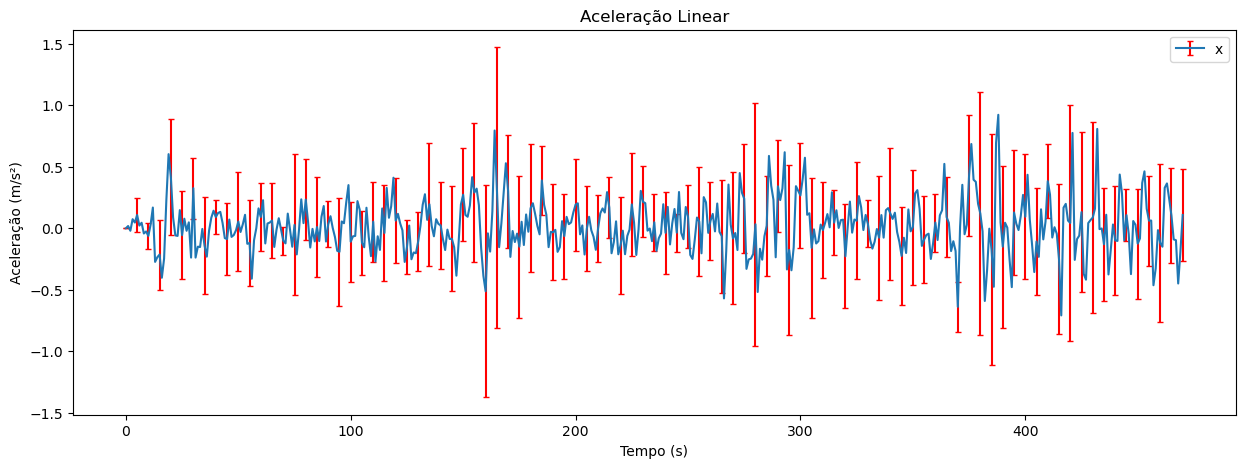

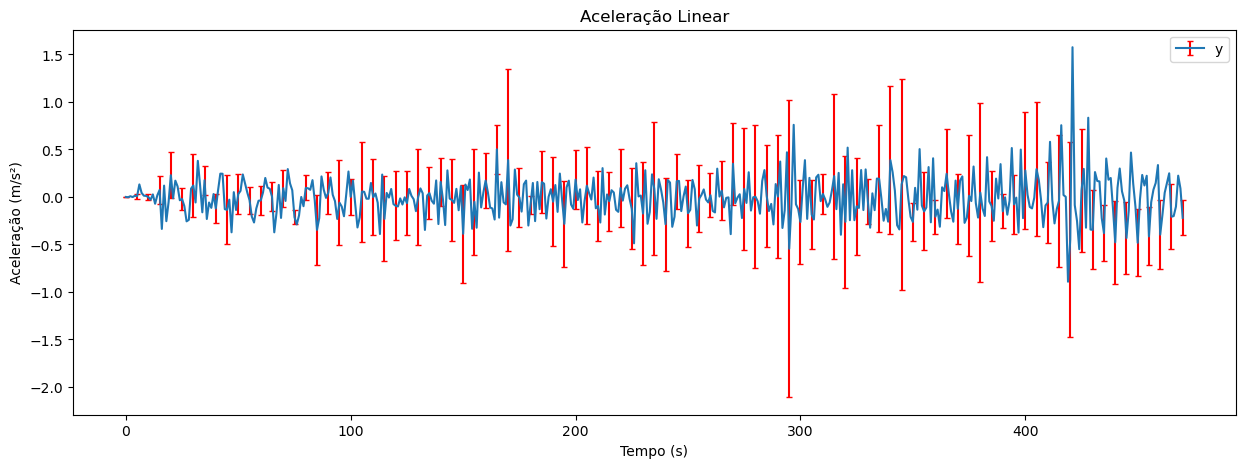

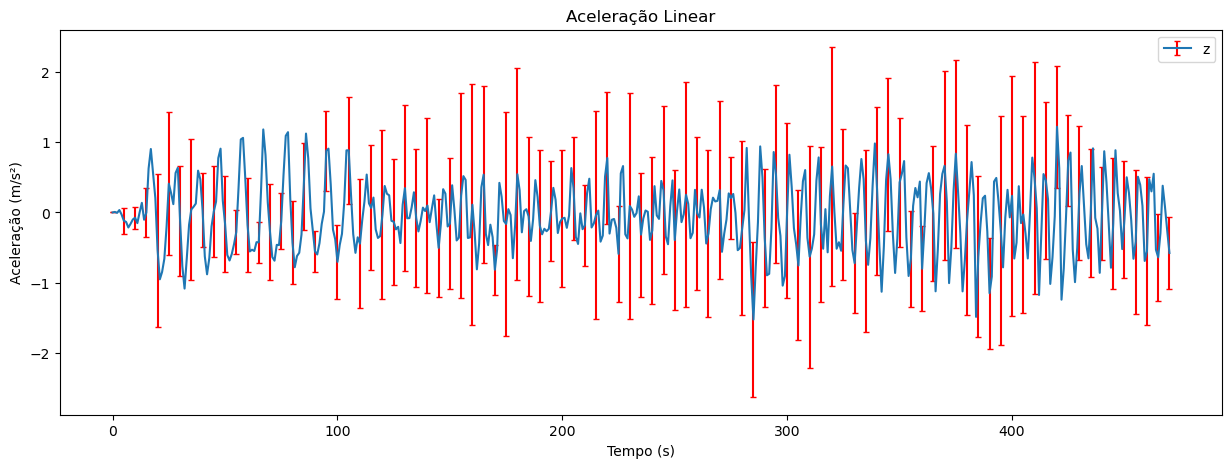

In [98]:
instances_accel = list(map(lambda x: x.sensors3['linear_acceleration'][['x', 'y', 'z']][:471].reset_index(), muv_zz_ds.instances.values()))

instances_mean = pd.concat(instances_accel).groupby(level=0).mean()
instances_std = pd.concat(instances_accel).groupby(level=0).std()

plotmean(instances_mean, instances_std, dimensions='x', title="Aceleração Linear", ylabel="Aceleração (m/s²)")
plotmean(instances_mean, instances_std, dimensions='y', title="Aceleração Linear", ylabel="Aceleração (m/s²)")
plotmean(instances_mean, instances_std, dimensions='z', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

- #### **Campo magnético** (orientação)

Instância: '1-2025-05-22-15-39-52-283'


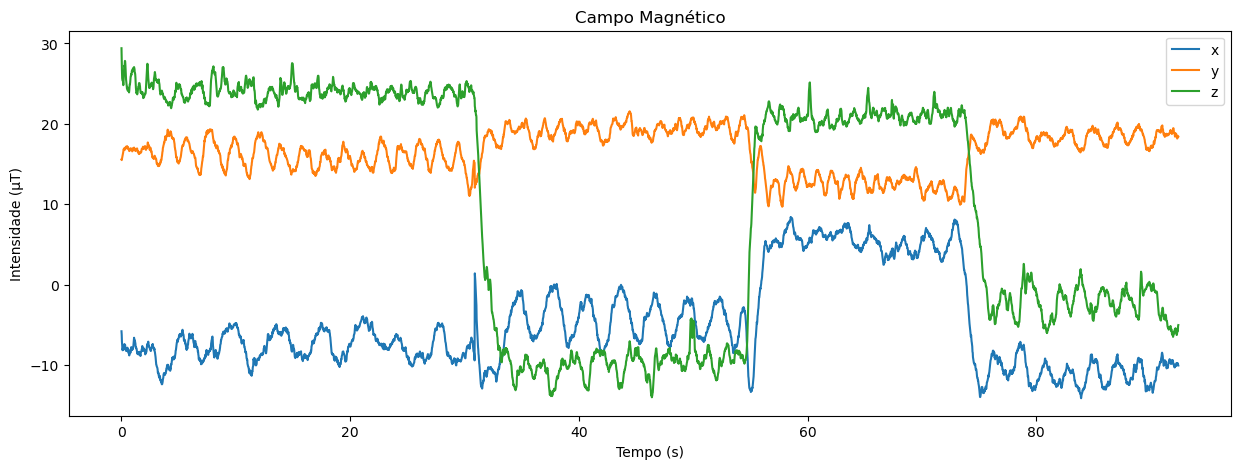

In [99]:
muv_zz_sample = muv_zz_ds.instance
print(f"Instância: '{muv_zz_sample.name}'")
muv_zz_sample_magnet = muv_zz_sample.sensors3['ak09918 magnetometer'] 

plotxyz(muv_zz_sample_magnet, dimensions='xyz', title="Campo Magnético", ylabel="Intensidade (μT)")

- #### **Giroscópio** (rotação)

Instância: '1-2025-05-22-15-39-52-283'


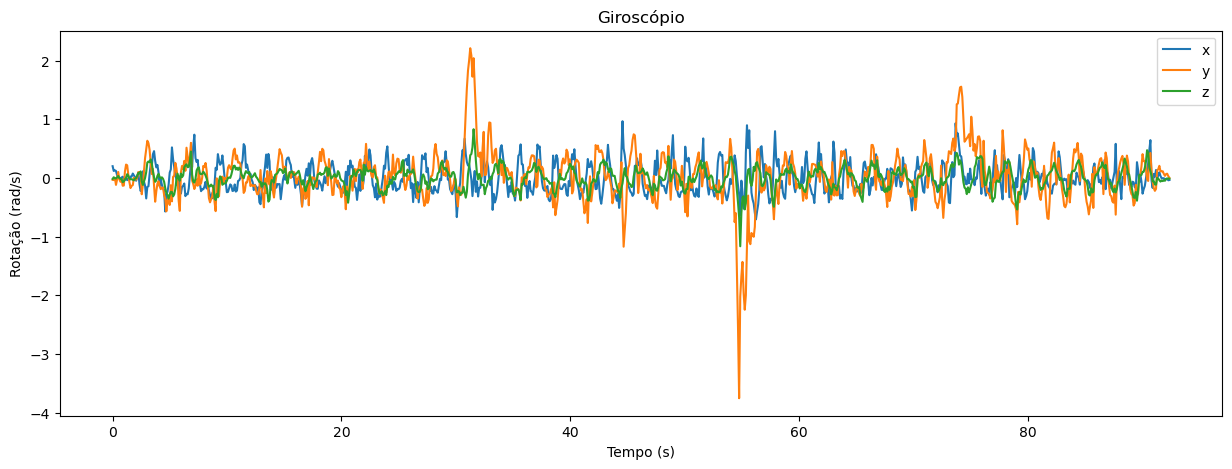

In [100]:
muv_zz_sample = muv_zz_ds.instance
print(f"Instância: '{muv_zz_sample.name}'")
muv_zz_sample_gyro = muv_zz_sample.sensors3['lsm6dso lsm6dso gyroscope non-wakeup'] 

plotxyz(muv_zz_sample_gyro, dimensions='xyz', title="Giroscópio", ylabel="Rotação (rad/s)")

---
---
# Dados reais

- #### **Movimento retilíneo uniforme**

In [101]:
instances_tempo = mu_reta_ds.instances

mov_ret_unif = []

print("MRU:")

for instance in instances_tempo:
    
    data = instances_tempo[instance].sensors3['linear_acceleration']
    
    time_col = instances_tempo[instance].sensors3['linear_acceleration']['Time (s)']
    final = time_col[time_col.shape[0] - 1]
    
    acc_media = np.mean((data["x"] + data["z"])/2)

    data['magnitude'] = np.sqrt(
        data['x']**2 +
        data['y']**2 +
        data['z']**2
    )

    spike_indices = data.index[data['magnitude'] > 8]

    dummy = data.loc[spike_indices, 'Time (s)'].tolist()
    spike_tempos = [0, dummy[0]]
    last = dummy[0]
    
    for num in dummy:
        if (num - last > 6 and not(final - num < 6)):
                spike_tempos.append(num)
                last = num
    
    spike_tempos.append(final)
    
    vel_media = 32/spike_tempos[4]
    
    mov_ret_unif.append([spike_tempos, vel_media, acc_media])

    print(f"Tempos de Intervalo: {spike_tempos} | Velocidade média: {vel_media} | Acelerção média: {acc_media}")

MRU:
Tempos de Intervalo: [0, 23.899, 45.856, 65.458, 86.816] | Velocidade média: 0.36859565057132326 | Acelerção média: 0.015295396309572072
Tempos de Intervalo: [0, 20.384, 41.553, 60.961, 79.774] | Velocidade média: 0.4011332012936546 | Acelerção média: 0.020595359978848034
Tempos de Intervalo: [0, 22.539, 44.482, 65.857, 90.351] | Velocidade média: 0.354174275879625 | Acelerção média: 0.0332996074245671
Tempos de Intervalo: [0, 21.366, 41.761, 63.905, 84.897] | Velocidade média: 0.37692733547710755 | Acelerção média: -0.02182435938870967
Tempos de Intervalo: [0, 20.163, 41.501, 63.82, 85.978] | Velocidade média: 0.3721882341994464 | Acelerção média: -0.01860589311604545


- #### **Movimento em zigue zague uniforme**

In [102]:
instances_tempo = mu_zz_ds.instances

mov_zz_unif = []

print("MZZU:")

for instance in instances_tempo:
    
    data = instances_tempo[instance].sensors3['lsm6dso lsm6dso gyroscope non-wakeup']
    
    time_col = instances_tempo[instance].sensors3['lsm6dso lsm6dso gyroscope non-wakeup']['Time (s)']
    final = time_col[time_col.shape[0] - 1]
    
    acc_media = np.mean((data["x"] + data["z"])/2)

    data['magnitude'] = np.sqrt(
        data['x']**2 +
        data['y']**2 +
        data['z']**2
    )

    spike_indices = data.index[data['magnitude'] > 1.5]

    dummy = data.loc[spike_indices, 'Time (s)'].tolist()
    spike_tempos = [0, dummy[0]]
    last = dummy[0]
    
    for num in dummy:
        if (num - last > 6 and not(final - num < 6)):
                spike_tempos.append(num)
                last = num
    
    spike_tempos.append(final)
    
    vel_media = 32/spike_tempos[4]
    
    mov_zz_unif.append([spike_tempos, vel_media, acc_media])

    print(f"Tempos de Intervalo: {spike_tempos} | Velocidade média: {vel_media} | Acelerção média: {acc_media}")

MZZU:
Tempos de Intervalo: [0, 19.801, 41.459, 58.898, 79.682] | Velocidade média: 0.4015963454732562 | Acelerção média: 0.0004775662866339059
Tempos de Intervalo: [0, 19.407, 36.852, 54.294, 74.677] | Velocidade média: 0.42851212555405277 | Acelerção média: 0.0006073622511533429
Tempos de Intervalo: [0, 20.287, 37.731, 55.274, 75.652] | Velocidade média: 0.4229894781367313 | Acelerção média: -0.006228371079443725
Tempos de Intervalo: [0, 19.601, 37.045, 54.49, 74.383] | Velocidade média: 0.43020582660016404 | Acelerção média: 0.004255356610552633
Tempos de Intervalo: [0, 19.801, 37.341, 54.688, 74.29] | Velocidade média: 0.4307443801319154 | Acelerção média: 0.001853218184018446


- #### **Movimento retilíneo acelerado**

In [103]:
instances_tempo = muv_reta_ds.instances

mov_ret_acc = []

print("MRA:")

for instance in instances_tempo:
    
    data = instances_tempo[instance].sensors3['linear_acceleration']
    
    time_col = instances_tempo[instance].sensors3['linear_acceleration']['Time (s)']
    final = time_col[time_col.shape[0] - 1]
    
    acc_media = math.sqrt(np.mean((data["x"]**2 + data["z"]**2)/2))

    data['magnitude'] = np.sqrt(
        data['x']**2 +
        data['y']**2 +
        data['z']**2
    )

    spike_indices = data.index[data['magnitude'] > 7]

    dummy = data.loc[spike_indices, 'Time (s)'].tolist()
    spike_tempos = [0, dummy[0]]
    last = dummy[0]
    
    for num in dummy:
        if (num - last > 6 and not(final - num < 6)):
                spike_tempos.append(num)
                last = num
    
    spike_tempos.append(final)
    
    vel_media = 32/spike_tempos[4]
    
    mov_ret_acc.append([spike_tempos, vel_media, acc_media])
    
    print(f"Tempos de Intervalo: {spike_tempos} | Velocidade média: {vel_media} | Acelerção média: {acc_media}")

MRA:
Tempos de Intervalo: [0, 31.558, 54.492, 74.483, 94.081] | Velocidade média: 0.34013243906846224 | Acelerção média: 0.873994819799155
Tempos de Intervalo: [0, 32.34, 56.055, 75.85, 95.251] | Velocidade média: 0.33595447816820817 | Acelerção média: 0.9755899442646826
Tempos de Intervalo: [0, 31.16, 55.077, 74.871, 94.076] | Velocidade média: 0.34015051660359713 | Acelerção média: 0.8324825495228981
Tempos de Intervalo: [0, 32.141, 55.644, 76.403, 95.98] | Velocidade média: 0.3334027922483851 | Acelerção média: 0.8996225488993531
Tempos de Intervalo: [0, 29.791, 53.897, 73.303, 92.903] | Velocidade média: 0.3444452816378373 | Acelerção média: 0.8936416648711105


- #### **Movimento em zigue zague acelerado**

In [104]:
instances_tempo = muv_zz_ds.instances

mov_zz_acc = []

print("MZZA:")

for instance in instances_tempo:
    
    data = instances_tempo[instance].sensors3['lsm6dso lsm6dso gyroscope non-wakeup']
    
    time_col = instances_tempo[instance].sensors3['lsm6dso lsm6dso gyroscope non-wakeup']['Time (s)']
    final = time_col[time_col.shape[0] - 1]
    
    acc_media = math.sqrt(np.mean((data["x"]**2 + data["z"]**2)/2))

    data['magnitude'] = np.sqrt(
        data['x']**2 +
        data['y']**2 +
        data['z']**2
    )

    spike_indices = data.index[data['magnitude'] > 1.5]

    dummy = data.loc[spike_indices, 'Time (s)'].tolist()
    spike_tempos = [0, dummy[0]]
    last = dummy[0]
    
    for num in dummy:
        if (num - last > 6 and not(final - num < 6) and len(spike_tempos) < 4):
                spike_tempos.append(num)
                last = num
    
    spike_tempos.append(final)
    
    vel_media = 32/spike_tempos[4]
    
    mov_zz_acc.append([spike_tempos, vel_media, acc_media])

    print(f"Tempos de Intervalo: {spike_tempos} | Velocidade média: {vel_media} | Acelerção média: {acc_media}")

MZZA:
Tempos de Intervalo: [0, 31.853, 55.765, 75.651, 94.366] | Velocidade média: 0.3391051861899413 | Acelerção média: 0.19087546490476032
Tempos de Intervalo: [0, 30.97, 54.575, 73.794, 92.389] | Velocidade média: 0.3463615798417561 | Acelerção média: 0.21598445140630645
Tempos de Intervalo: [0, 31.752, 55.662, 75.158, 94.554] | Velocidade média: 0.3384309495103327 | Acelerção média: 0.2307548854648298
Tempos de Intervalo: [0, 31.267, 54.593, 74.197, 94.181] | Velocidade média: 0.3397712914494431 | Acelerção média: 0.20004030058023672
Tempos de Intervalo: [0, 31.962, 55.598, 76.584, 98.266] | Velocidade média: 0.3256467140211263 | Acelerção média: 0.20414610581211154


## Tempos de intervalo médios

- #### **Movimento retilíneo uniforme**

In [105]:
tempos = []

for i in range(len(mov_ret_unif)):
    tempos.append(mov_ret_unif[i][0])

media = []
dp = []

for j in range(len(tempos)):
    
    media.append((tempos[0][j] + tempos[1][j] + tempos[2][j] + tempos[3][j] + tempos[4][j])/5)
    dp.append(np.std([tempos[0][j], tempos[1][j], tempos[2][j], tempos[3][j], tempos[4][j]]))

print("MRU:")
print(f"Tempos de intervalo médios: {media}")
print(f"Desvio Padrão: {dp}")

MRU:
Tempos de intervalo médios: [0.0, 21.6702, 43.0306, 64.0002, 85.56320000000001]
Desvio Padrão: [0.0, 1.3957695225215374, 1.8013500048574689, 1.723436033045613, 3.4241277663077927]


- #### **Movimento em zigue zague uniforme**

In [106]:
tempos = []

for i in range(len(mov_zz_unif)):
    tempos.append(mov_zz_unif[i][0])

media = []
dp = []

for j in range(len(tempos)):
    
    media.append((tempos[0][j] + tempos[1][j] + tempos[2][j] + tempos[3][j] + tempos[4][j])/5)
    dp.append(np.std([tempos[0][j], tempos[1][j], tempos[2][j], tempos[3][j], tempos[4][j]]))

print("MZZU:")
print(f"Tempos de intervalo médios: {media}")
print(f"Desvio Padrão: {dp}")

MZZU:
Tempos de intervalo médios: [0.0, 19.779400000000003, 38.0856, 55.528800000000004, 75.7368]
Desvio Padrão: [0.0, 0.29295023468159204, 1.7125778931190268, 1.716229168846633, 2.030811404340639]


- #### **Movimento retilíneo acelerado**

In [107]:
tempos = []

for i in range(len(mov_ret_acc)):
    tempos.append(mov_ret_acc[i][0])

media = []
dp = []

for j in range(len(tempos)):
    
    media.append((tempos[0][j] + tempos[1][j] + tempos[2][j] + tempos[3][j] + tempos[4][j])/5)
    dp.append(np.std([tempos[0][j], tempos[1][j], tempos[2][j], tempos[3][j], tempos[4][j]]))

print("MRA:")
print(f"Tempos de intervalo médios: {media}")
print(f"Desvio Padrão: {dp}")

MRA:
Tempos de intervalo médios: [0.0, 31.398000000000003, 55.033, 74.982, 94.4582]
Desvio Padrão: [0.0, 0.9059918321927635, 0.7749732898623027, 1.081945285123052, 1.063147289889788]


- #### **Movimento em zigue zague acelerado**

In [108]:
tempos = []

for i in range(len(mov_zz_acc)):
    tempos.append(mov_zz_acc[i][0])

media = []
dp = []

for j in range(len(tempos)):
    
    media.append((tempos[0][j] + tempos[1][j] + tempos[2][j] + tempos[3][j] + tempos[4][j])/5)
    dp.append(np.std([tempos[0][j], tempos[1][j], tempos[2][j], tempos[3][j], tempos[4][j]]))

print("MZZA:")
print(f"Tempos de intervalo médios: {media}")
print(f"Desvio Padrão: {dp}")

MZZA:
Tempos de intervalo médios: [0.0, 31.5608, 55.238600000000005, 75.0768, 94.7512]
Desvio Padrão: [0.0, 0.37901525035280625, 0.5371586730194331, 1.0027536885995492, 1.9207395867217432]


## Velocidade média

- #### **Movimento retilíneo uniforme**

In [109]:
vel_media = []

for i in range(len(mov_ret_unif)):
    vel_media.append(mov_ret_unif[i][1])

print("MRU:")
print(f"Velocidade média: {np.mean(vel_media)}")
print(f"Desvio Padrão: {np.std(vel_media)}")

MRU:
Velocidade média: 0.37460373948423137
Desvio Padrão: 0.015287290299944752


- #### **Movimento em zigue zague uniforme**

In [110]:
vel_media = []

for i in range(len(mov_zz_unif)):
    vel_media.append(mov_zz_unif[i][1])

print("MZZU:")
print(f"Velocidade média: {np.mean(vel_media)}")
print(f"Desvio Padrão: {np.std(vel_media)}")

MZZU:
Velocidade média: 0.422809631179224
Desvio Padrão: 0.010956443082616446


- #### **Movimento retilíneo acelerado**

In [111]:
vel_media = []

for i in range(len(mov_ret_acc)):
    vel_media.append(mov_ret_acc[i][1])

print("MRA:")
print(f"Velocidade média: {np.mean(vel_media)}")
print(f"Desvio Padrão: {np.std(vel_media)}")

MRA:
Velocidade média: 0.338817101545298
Desvio Padrão: 0.003812974624444722


- #### **Movimento em zigue zague acelerado**

In [112]:
vel_media = []

for i in range(len(mov_zz_acc)):
    vel_media.append(mov_zz_acc[i][1])

print("MZZA:")
print(f"Velocidade média: {np.mean(vel_media)}")
print(f"Desvio Padrão: {np.std(vel_media)}")

MZZA:
Velocidade média: 0.33786314420251984
Desvio Padrão: 0.006737516927966003


## Aceleração média

- #### **Movimento retilíneo uniforme**

In [113]:
acc_media = []

for i in range(len(mov_ret_unif)):
    acc_media.append(mov_ret_unif[i][2])

print("MRU:")
print(f"Aceleração média: {np.mean(acc_media)}")
print(f"Desvio Padrão: {np.std(acc_media)}")

MRU:
Aceleração média: 0.005752022241646416
Desvio Padrão: 0.022018333168461152


- #### **Movimento em zigue zague uniforme**

In [114]:
acc_media = []

for i in range(len(mov_zz_unif)):
    acc_media.append(mov_zz_unif[i][2])

print("MZZU:")
print(f"Aceleração média: {np.mean(acc_media)}")
print(f"Desvio Padrão: {np.std(acc_media)}")

MZZU:
Aceleração média: 0.0001930264505829205
Desvio Padrão: 0.0034855629741243743


- #### **Movimento retilíneo acelerado**

In [115]:
acc_media = []

for i in range(len(mov_ret_acc)):
    acc_media.append(mov_ret_acc[i][2])

print("MRA:")
print(f"Aceleração média: {np.mean(acc_media)}")
print(f"Desvio Padrão: {np.std(acc_media)}")

MRA:
Aceleração média: 0.8950663054714398
Desvio Padrão: 0.046620981063429094


- #### **Movimento em zigue zague acelerado**

In [116]:
acc_media = []

for i in range(len(mov_zz_acc)):
    acc_media.append(mov_zz_acc[i][2])

print("MZZA:")
print(f"Aceleração média: {np.mean(acc_media)}")
print(f"Desvio Padrão: {np.std(acc_media)}")

MZZA:
Aceleração média: 0.20836024163364897
Desvio Padrão: 0.013801061003391278


---
# Simulação por Algoritmo de Euler

## Movimento retilíneo uniforme

Velocidade média: 0.3737 m/s
Desvio padrão médio das velocidades: 0.0164 m/s

Tempos médios:
 - t0 = 0.0
 - t1 = 21.502000000000034
 - t2 = 42.94800000000033
 - t3 = 64.40200000000054
 - t4 = 85.8519999999994
Desvio padrão dos tempos médios:
 - t0 = 0.0
 - t1 = 0.9473098753839873
 - t2 = 1.8985510264409808
 - t3 = 2.8507185059208395
 - t4 = 3.7962212791140564


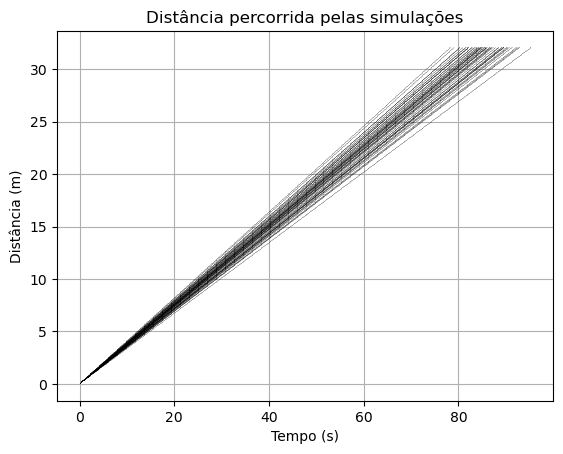

In [117]:
k = 0.37460373948423137
std = 0.015287290299944752
kss = []

xe = [[0] for _ in range(50)]

ts = [[0]*50 for _ in range(5)]
dt = 0.1

for j in range(50):
    ks = k + np.random.normal(0, std)
    kss.append(ks)
    
    state_vec = np.array([0, ks])
    
    t = 0
    for i in range(1, 5):
        while state_vec[0] < i*8:
            state_vec[0] = state_vec[0] + state_vec[1]*dt
            xe[j].append(state_vec[0])
            t += dt
            
        ts[i][j] = t

print(f"Velocidade média: {np.mean(kss):.4f} m/s")
print(f"Desvio padrão médio das velocidades: {np.std(kss):.4f} m/s\n")

df = pd.DataFrame(list(zip(*ts)), columns=['t0', 't1', 't2,', 't3', 't4'])
df.to_csv('Dados/MRU_tempos_Euler.csv', index=False, decimal=',')

data = {'velocidade': kss}
df = pd.DataFrame(data)
df.to_csv('Dados/MRU_dados_Euler.csv', index=False, decimal=',')

print("Tempos médios:")
for i in range(5):
    print(f" - t{i} = {np.mean(ts[i])}")
    
print("Desvio padrão dos tempos médios:")
for i in range(5):
    print(f" - t{i} = {np.std(ts[i])}")

for j in range(50):
    xaxis = np.linspace(0, ts[4][j], len(xe[j]))
    plt.plot(xaxis, xe[j], ',k', alpha=0.2)
    
plt.title('Distância percorrida pelas simulações')
plt.ylabel('Distância (m)')
plt.xlabel('Tempo (s)')
plt.grid(True)
plt.show()

## Movimento em zigue zague uniforme

Velocidade média: 0.4210 m/s
Desvio padrão médio das velocidades: 0.0114 m/s

Tempos médios:
 - t0 = 0.0
 - t1 = 19.068
 - t2 = 38.08200000000027
 - t3 = 57.096000000000544
 - t4 = 76.11799999999995
Desvio padrão dos tempos médios:
 - t0 = 0.0
 - t1 = 0.519399653446176
 - t2 = 1.0312497272727057
 - t3 = 1.5434973275001378
 - t4 = 2.0636559790816675


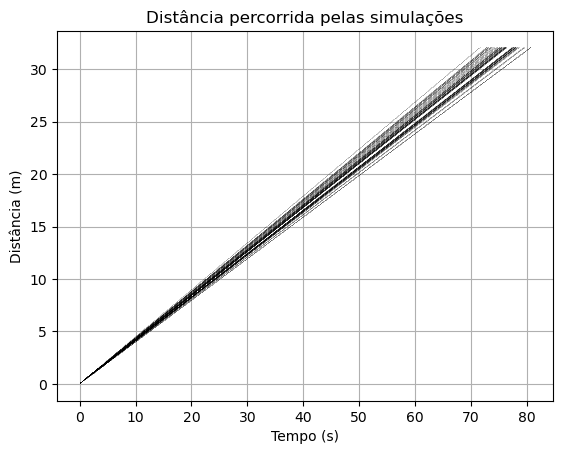

In [ ]:

k = 0.422809631179224
std = 0.010956443082616446
kss = []

xe = [[0] for _ in range(50)]

ts = [[0]*50 for _ in range(5)]
dt = 0.1

for j in range(50):
    ks = k + np.random.normal(0, std)
    kss.append(ks)
    
    state_vec = np.array([0, ks])
    
    t = 0
    for i in range(1, 5):
        while state_vec[0] < i*8:
            state_vec[0] = state_vec[0] + state_vec[1]*dt
            xe[j].append(state_vec[0])
            t += dt
            
        ts[i][j] = t

print(f"Velocidade média: {np.mean(kss):.4f} m/s")
print(f"Desvio padrão médio das velocidades: {np.std(kss):.4f} m/s\n")

df = pd.DataFrame(list(zip(*ts)), columns=['t0', 't1', 't2,', 't3', 't4'])
df.to_csv('Dados/MZZU_tempos_Euler.csv', index=False, decimal=',')

data = {'velocidade': kss}
df = pd.DataFrame(data)
df.to_csv('Dados/MZZU_dados_Euler.csv', index=False, decimal=',')

print("Tempos médios:")
for i in range(5):
    print(f" - t{i} = {np.mean(ts[i])}")
    
print("Desvio padrão dos tempos médios:")
for i in range(5):
    print(f" - t{i} = {np.std(ts[i])}")

for j in range(50):
    xaxis = np.linspace(0, ts[4][j], len(xe[j]))
    plt.plot(xaxis, xe[j], ',k', alpha=0.2)
    
plt.title('Distância percorrida pelas simulações')
plt.ylabel('Distância (m)')
plt.xlabel('Tempo (s)')
plt.grid(True)
plt.show()

## Movimento retilíneo acelerado

Aceleração média: 0.0019 m/s²
Desvio padrão médio das acelerações: 0.0001 m/s²

Tempos médios:
 - t0 = 0.0
 - t1 = 28.89800000000014
 - t2 = 53.326000000000484
 - t3 = 74.88400000000003
 - t4 = 94.40599999999891
Desvio padrão dos tempos médios:
 - t0 = 0.0
 - t1 = 0.15555063484280832
 - t2 = 0.43717730956673106
 - t3 = 0.7777814603086983
 - t4 = 1.1259502653314026


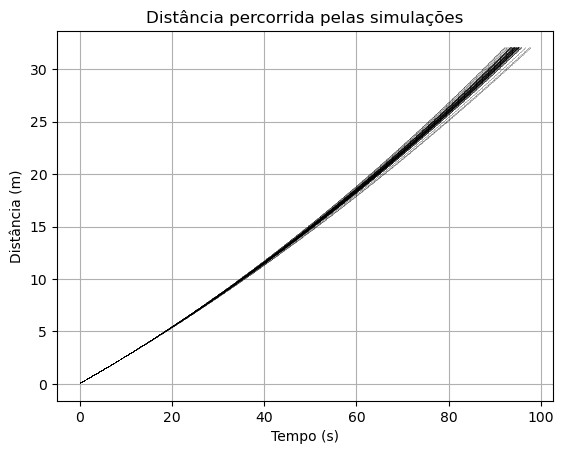

In [119]:
v0 = 0.25
a = []
for instance in muv_reta_ds.instances.values():
    time_col = instance.sensors3['linear_acceleration']['Time (s)']
    tf = time_col[time_col.shape[0] - 1]
    a.append(((32 - v0*tf)/(tf**2)) * 2)
    
k = np.mean(a)
std = np.std(a)
kss = []

ve = [[v0] for _ in range(50)]
xe = [[0] for _ in range(50)]

ts = [[0]*50 for _ in range(5)]
dt = 0.1

for j in range(50):
    ks = k + np.random.normal(0, std)
    kss.append(ks)
    
    state_vec = np.array([0, v0, ks])
    
    t = 0
    for i in range(1, 5):
        while state_vec[0] < i*8:
            state_vec[1] = state_vec[1] + state_vec[2]*dt
            state_vec[0] = state_vec[0] + state_vec[1]*dt
            ve[j].append(state_vec[1])
            xe[j].append(state_vec[0])
            t += dt
            
        ts[i][j] = t

print(f"Aceleração média: {np.mean(kss):.4f} m/s²")
print(f"Desvio padrão médio das acelerações: {np.std(kss):.4f} m/s²\n")

df = pd.DataFrame(list(zip(*ts)), columns=['t0', 't1', 't2,', 't3', 't4'])
df.to_csv('Dados/MRA_tempos_Euler.csv', index=False, decimal=',')

data = {'aceleração': kss}
df = pd.DataFrame(data)
df.to_csv('Dados/MRA_dados_Euler.csv', index=False, decimal=',')

print("Tempos médios:")
for i in range(5):
    print(f" - t{i} = {np.mean(ts[i])}")
    
print("Desvio padrão dos tempos médios:")
for i in range(5):
    print(f" - t{i} = {np.std(ts[i])}")

for j in range(50):
    xaxis = np.linspace(0, ts[4][j], len(xe[j]))
    plt.plot(xaxis, xe[j], ',k', alpha=0.2)
    
plt.title('Distância percorrida pelas simulações')
plt.ylabel('Distância (m)')
plt.xlabel('Tempo (s)')
plt.grid(True)
plt.show()

## Movimento em zigue zague acelerado

Aceleração média: 0.0019 m/s²
Desvio padrão médio das acelerações: 0.0002 m/s²

Tempos médios:
 - t0 = 0.0
 - t1 = 28.89800000000014
 - t2 = 53.34000000000048
 - t3 = 74.91400000000002
 - t4 = 94.4639999999989
Desvio padrão dos tempos médios:
 - t0 = 0.0
 - t1 = 0.21862296311229837
 - t2 = 0.6520736154760535
 - t3 = 1.1506537272350226
 - t4 = 1.6682637681133292


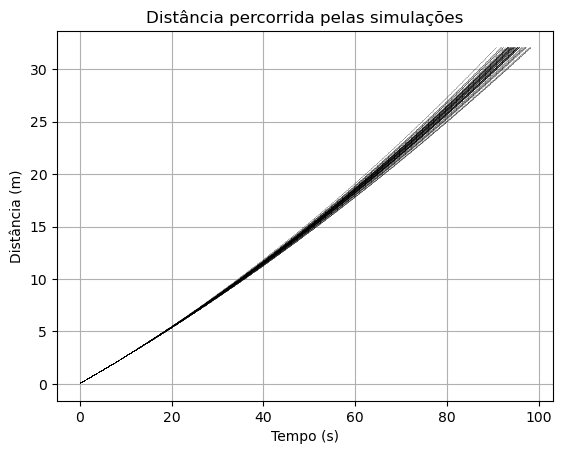

In [120]:
v0 = 0.25
a = []
for instance in muv_zz_ds.instances.values():
    time_col = instance.sensors3['linear_acceleration']['Time (s)']
    tf = time_col[time_col.shape[0] - 1]
    a.append(((32 - v0*tf)/(tf**2)) * 2)
    
k = np.mean(a)
std = np.std(a)
kss = []

ve = [[v0] for _ in range(50)]
xe = [[0] for _ in range(50)]

ts = [[0]*50 for _ in range(5)]
dt = 0.1

for j in range(50):
    ks = k + np.random.normal(0, std)
    kss.append(ks)
    
    state_vec = np.array([0, v0, ks])
    
    t = 0
    for i in range(1, 5):
        while state_vec[0] < i*8:
            state_vec[1] = state_vec[1] + state_vec[2]*dt
            state_vec[0] = state_vec[0] + state_vec[1]*dt
            ve[j].append(state_vec[1])
            xe[j].append(state_vec[0])
            t += dt
            
        ts[i][j] = t

print(f"Aceleração média: {np.mean(kss):.4f} m/s²")
print(f"Desvio padrão médio das acelerações: {np.std(kss):.4f} m/s²\n")

df = pd.DataFrame(list(zip(*ts)), columns=['t0', 't1', 't2,', 't3', 't4'])
df.to_csv('Dados/MZZA_tempos_Euler.csv', index=False, decimal=',')

data = {'aceleração': kss}
df = pd.DataFrame(data)
df.to_csv('Dados/MZZA_dados_Euler.csv', index=False, decimal=',')

print("Tempos médios:")
for i in range(5):
    print(f" - t{i} = {np.mean(ts[i])}")
    
print("Desvio padrão dos tempos médios:")
for i in range(5):
    print(f" - t{i} = {np.std(ts[i])}")

for j in range(50):
    xaxis = np.linspace(0, ts[4][j], len(xe[j]))
    plt.plot(xaxis, xe[j], ',k', alpha=0.2)

plt.title('Distância percorrida pelas simulações')
plt.ylabel('Distância (m)')
plt.xlabel('Tempo (s)')
plt.grid(True)
plt.show()

---
# Simulação por Monte Carlo

## Movimento retilíneo uniforme

MRU:
Velocidade média: 0.37429520008666456
Desvio Padrão: 0.016126183155645013

Tempos de intervalo médios: [0.0, 21.458000000000034, 42.87000000000034, 64.28800000000055, 85.6999999999994]
Desvio Padrão: [0.0, 0.945957715756907, 1.8790689183742304, 2.8071081204683894, 3.7476926234682595]


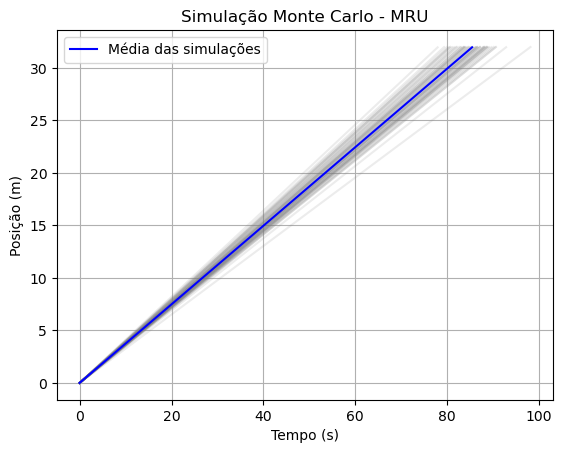

In [121]:

def simulacaoMRU(dt, v):
    
    espaco = []
    i_tempos = []
    i_breaks = [0]
    
    s = 0
    t = 0
    c = 1
    
    while (s <= 32):
    
        last = s
        
        espaco.append(last)
        i_tempos.append(t)
        
        t += dt
        s = v * t
        
        if (last <= c*8 and s >= c*8):
            c += 1
            i_breaks.append(t)
            
    return(espaco, i_tempos, i_breaks)
    
vel = 0.374603739484231
dp = 0.0152872902999447

simulacoes = 50
dt = 0.1

posicoes = []
velocidades = []
tempos = []
breaks = []

for i in range(simulacoes):
    
    v = vel + np.random.normal(0, dp)
    
    espaco, i_tempos, i_breaks = simulacaoMRU(dt, v)

    posicoes.append(espaco)
    velocidades.append(v)
    tempos.append(i_tempos)
    breaks.append(i_breaks)


vel_media = np.mean(velocidades)
vel_dp = np.std(velocidades)

sim_media_pos, sim_media_t, sim_media_break = simulacaoMRU(dt, vel_media)

media_break = []
dp_break = []

for j in range(5):
    
    media_break.append(sum(row[j] for row in breaks) / simulacoes)
    dp_break.append(np.std([row[j] for row in breaks]))

sim_media_pos = np.array(sim_media_pos)
sim_media_t = np.array(sim_media_t)

print("MRU:")
print(f"Velocidade média: {vel_media}")
print(f"Desvio Padrão: {vel_dp}\n")

print(f"Tempos de intervalo médios: {media_break}")
print(f"Desvio Padrão: {dp_break}")

df = pd.DataFrame(breaks, columns=['t0', 't1', 't2,', 't3', 't4'])
df.to_csv('Dados/MRU_tempos.csv', index=False, decimal=',')

data = {'velocidade': velocidades}
df = pd.DataFrame(data)
df.to_csv('Dados/MRU_dados.csv', index=False, decimal=',')
    
for i in range(simulacoes):
    plt.plot(tempos[i], posicoes[i], color='gray', alpha=0.15)

plt.plot(sim_media_t, sim_media_pos, color='blue', label="Média das simulações")

plt.title(f"Simulação Monte Carlo - MRU")
plt.xlabel("Tempo (s)")
plt.ylabel("Posição (m)")
plt.legend()
plt.grid(True)
plt.show()

## Movimento em zigue zague uniforme

MRU:
Velocidade média: 0.42148930056521894
Desvio Padrão: 0.012318864869545062

Tempos de intervalo médios: [0.0, 19.054000000000002, 38.160000000000274, 57.26600000000054, 76.37199999999993]
Desvio Padrão: [0.0, 0.5539711183807409, 1.116960160435472, 1.6806677244476613, 2.244552516649906]


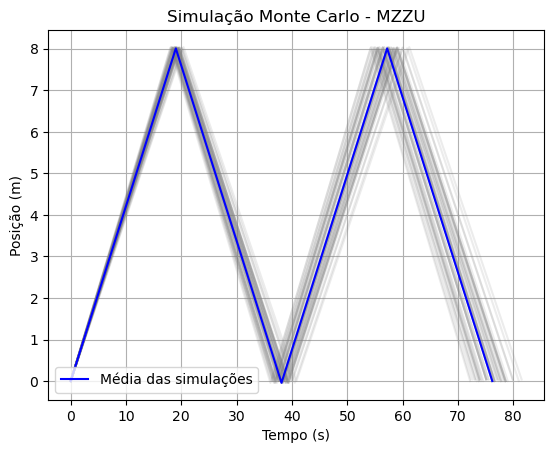

In [122]:

def simulacaoMZZU(dt, v):
    
    espaco = []
    i_tempos = []
    i_breaks = [0]
    
    s = 0
    t = 0
    
    while (len(i_breaks) < 5):
    
        last = s
        
        espaco.append(last)
        i_tempos.append(t)
        
        t += dt
        
        s += v * dt
        
        if ((v <= 0 and last >= 0 and s <= 0) or (v >= 0 and last <= 8 and s >= 8)):
            v *= -1        
            i_breaks.append(t)
            
    return(espaco, i_tempos, i_breaks)
    
vel = 0.422809631179224
dp = 0.0109564430826164

simulacoes = 50
dt = 0.1

posicoes = []
velocidades = []
tempos = []
breaks = []

for i in range(simulacoes):
    
    v = vel + np.random.normal(0, dp)
    
    espaco, i_tempos, i_breaks = simulacaoMZZU(dt, v)

    posicoes.append(espaco)
    velocidades.append(v)
    tempos.append(i_tempos)
    breaks.append(i_breaks)


vel_media = np.mean(velocidades)
vel_dp = np.std(velocidades)

sim_media_pos, sim_media_t, sim_media_break = simulacaoMZZU(dt, vel_media)

media_break = []
dp_break = []

for j in range(5):
    
    media_break.append(sum(row[j] for row in breaks) / simulacoes)
    dp_break.append(np.std([row[j] for row in breaks]))

sim_media_pos = np.array(sim_media_pos)
sim_media_t = np.array(sim_media_t)
    
sim_media_pos = np.array(sim_media_pos)
sim_media_t = np.array(sim_media_t)

print("MRU:")
print(f"Velocidade média: {vel_media}")
print(f"Desvio Padrão: {vel_dp}\n")

print(f"Tempos de intervalo médios: {media_break}")
print(f"Desvio Padrão: {dp_break}")

df = pd.DataFrame(breaks, columns=['t0', 't1', 't2,', 't3', 't4'])
df.to_csv('Dados/MZZU_tempos.csv', index=False, decimal=',')

data = {'velocidade': velocidades}
df = pd.DataFrame(data)
df.to_csv('Dados/MZZU_dados.csv', index=False, decimal=',')
    
for i in range(simulacoes):
    plt.plot(tempos[i], posicoes[i], color='gray', alpha=0.15)

plt.plot(sim_media_t, sim_media_pos, color='blue', label="Média das simulações")

plt.title(f"Simulação Monte Carlo - MZZU")
plt.xlabel("Tempo (s)")
plt.ylabel("Posição (m)")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

## Movimento retilíneo acelerado

MRA:
Velocidade média: 2.6718141376734392
Desvio Padrão: 0.012318864869545062

Aceleração média: 0.8906047125578139
Desvio Padrão: 0.046250003643473175

Tempos de intervalo médios: [0.0, 3.0520000000000014, 4.296000000000001, 5.243999999999997, 6.047999999999995]
Desvio Padrão: [0.0, 0.08304215796810684, 0.11482160075525819, 0.14164744967700568, 0.16521501142450648]


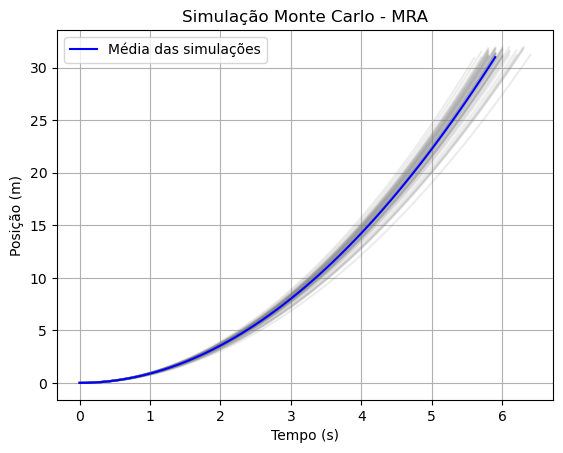

In [123]:

def simulacaoMRA(dt, a):
    
    espaco = []
    i_tempos = []
    i_breaks = [0]
    
    s = 0
    t = 0
    c = 1
    v = 0
    
    while (s <= 32):
    
        last = s
        
        espaco.append(last)
        i_tempos.append(t)
        
        t += dt
        v = a * t
        s = v * t
        
        if (last <= c*8 and s >= c*8):
            c += 1
            i_breaks.append(t)
            
    return(espaco, i_tempos, i_breaks, v/2)
    
vel = 0
acc = 0.895066305471439
dp = 0.046620981063429

simulacoes = 50
dt = 0.1

posicoes = []
velocidades = []
aceleracoes = []
tempos = []
breaks = []

for i in range(simulacoes):
    
    a = acc + np.random.normal(0, dp)
    
    espaco, i_tempos, i_breaks, v = simulacaoMRA(dt, a)

    posicoes.append(espaco)
    velocidades.append(v)
    aceleracoes.append(a)
    tempos.append(i_tempos)
    breaks.append(i_breaks)


acc_media = np.mean(aceleracoes)
acc_dp = np.std(aceleracoes)

sim_media_pos, sim_media_t, sim_media_break, vel_media = simulacaoMRA(dt, acc_media)

media_break = []
dp_break = []

for j in range(5):
    
    media_break.append(sum(row[j] for row in breaks) / simulacoes)
    dp_break.append(np.std([row[j] for row in breaks]))

sim_media_pos = np.array(sim_media_pos)
sim_media_t = np.array(sim_media_t)
    
sim_media_pos = np.array(sim_media_pos)
sim_media_t = np.array(sim_media_t)

print("MRA:")
print(f"Velocidade média: {vel_media}")
print(f"Desvio Padrão: {vel_dp}\n")

print(f"Aceleração média: {acc_media}")
print(f"Desvio Padrão: {acc_dp}\n")

print(f"Tempos de intervalo médios: {media_break}")
print(f"Desvio Padrão: {dp_break}")

df = pd.DataFrame(breaks, columns=['t0', 't1', 't2,', 't3', 't4'])
df.to_csv('Dados/MRA_tempos.csv', index=False, decimal=',')

data = {'velocidade': velocidades, 'aceleração': aceleracoes}
df = pd.DataFrame(data)
df.to_csv('Dados/MRA_dados.csv', index=False, decimal=',')
    
for i in range(simulacoes):
    plt.plot(tempos[i], posicoes[i], color='gray', alpha=0.15)

plt.plot(sim_media_t, sim_media_pos, color='blue', label="Média das simulações")

plt.title(f"Simulação Monte Carlo - MRA")
plt.xlabel("Tempo (s)")
plt.ylabel("Posição (m)")
plt.legend()
plt.grid(True)
plt.show()

## Movimento em zigue zague acelerado

MZZA:
Velocidade média: 1.83764459542774
Desvio Padrão: 0.012318864869545062

Aceleração média: 0.2053234184835459
Desvio Padrão: 0.013941481691351594

Tempos de intervalo médios: [0.0, 8.835999999999984, 12.565999999999972, 15.441999999999961, 17.887999999999984]
Desvio Padrão: [0.0, 0.308389364278341, 0.42923653153010954, 0.5150106795009204, 0.5988789527108213]


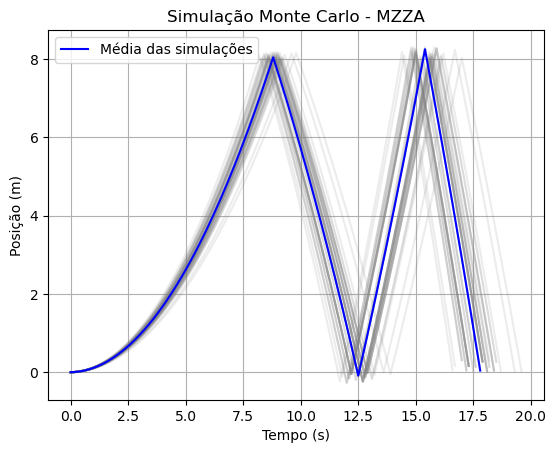

In [124]:

def simulacaoMZZA(dt, a):
    
    espaco = []
    i_tempos = []
    i_breaks = [0]
    
    s = 0
    t = 0
    v = 0
    
    while (len(i_breaks) < 5):
    
        last = s
        
        espaco.append(last)
        i_tempos.append(t)
        
        t += dt
        v += a * dt
        s += v * dt
        
        if ((v <= 0 and last >= 0 and s <= 0) or (v >= 0 and last <= 8 and s >= 8)):
            v *= -1 
            a *= -1       
            i_breaks.append(t)
            
    return(espaco, i_tempos, i_breaks, v/2)
    
vel = 0
acc = 0.208360241633648
dp = 0.0138010610033912

simulacoes = 50
dt = 0.1

posicoes = []
velocidades = []
aceleracoes = []
tempos = []
breaks = []

for i in range(simulacoes):
    
    a = acc + np.random.normal(0, dp)
    
    espaco, i_tempos, i_breaks, v = simulacaoMZZA(dt, a)

    posicoes.append(espaco)
    velocidades.append(v)
    aceleracoes.append(a)
    tempos.append(i_tempos)
    breaks.append(i_breaks)


acc_media = np.mean(aceleracoes)
acc_dp = np.std(aceleracoes)

sim_media_pos, sim_media_t, sim_media_break, vel_media = simulacaoMZZA(dt, acc_media)

media_break = []
dp_break = []

for j in range(5):
    
    media_break.append(sum(row[j] for row in breaks) / simulacoes)
    dp_break.append(np.std([row[j] for row in breaks]))

sim_media_pos = np.array(sim_media_pos)
sim_media_t = np.array(sim_media_t)
    
sim_media_pos = np.array(sim_media_pos)
sim_media_t = np.array(sim_media_t)

print("MZZA:")
print(f"Velocidade média: {vel_media}")
print(f"Desvio Padrão: {vel_dp}\n")

print(f"Aceleração média: {acc_media}")
print(f"Desvio Padrão: {acc_dp}\n")

print(f"Tempos de intervalo médios: {media_break}")
print(f"Desvio Padrão: {dp_break}")

df = pd.DataFrame(breaks, columns=['t0', 't1', 't2,', 't3', 't4'])
df.to_csv('Dados/MZZA_tempos.csv', index=False, decimal=',')

data = {'velocidade': velocidades, 'aceleração': aceleracoes}
df = pd.DataFrame(data)
df.to_csv('Dados/MZZA_dados.csv', index=False, decimal=',')
    
for i in range(simulacoes):
    plt.plot(tempos[i], posicoes[i], color='gray', alpha=0.15)

plt.plot(sim_media_t, sim_media_pos, color='blue', label="Média das simulações")

plt.title(f"Simulação Monte Carlo - MZZA")
plt.xlabel("Tempo (s)")
plt.ylabel("Posição (m)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()